In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from parametres import Paras
from utilities import *
from initialisation import *
from odes import odes_scale_size
import matplotlib.pyplot as plt
from size_scaled_func import *
import datetime as dt

Initialisation of parametres

In [2]:
def sim_run(N, M, para, assemblenum, tstop, teval):

    ### initialised parametres
    para = Paras(N, M)
    p, number = int_preferences(N, M, para.mu_c, assemblenum)
    D = int_conversion(M, para.Dbase, assemblenum)
    l = int_l(M, para.l_base, assemblenum)
    rho = int_rho(M, para.rho_base, assemblenum)
    vmax = int_vmax(N, M, para.v_max_base, p, number, assemblenum)
    m = int_mt(N, para.m_base, assemblenum)

    ## Initialised Initial conditions
    R0 = int_R(M, para.R0, assemblenum)
    C0 = int_C(N, para.w, assemblenum)

    # Load parametres
    para.paras(C0, R0, l, rho, p, vmax, m, D)
    time = np.linspace(0, tstop, teval)
    pars = (para.l, para.m, para.rho, para.mu, para.km, para.p, para.D, para.v_in_max, para.type, para.B0, para.M0, para.E0, para.alpha, para.gamma, para.R_half)
    y0 = np.concatenate((R0, C0)).reshape(M+N,) # initial conditions

    # run and store
    result = solve_ivp(
    odes_scale_size, t_span=[time[0], time[-1]], y0=y0, t_eval=time, args=pars, dense_output=True)

    Rt = result['y'][0:M]
    Ct = result['y'][M:M+N]
    t = result['t']


    return Rt, Ct, t, para
    

In [3]:
N = 25
M = 50
#assemblenum = 1
para = Paras(N, M)

In [4]:
Rt_assemblies = []
Ct_assemblies = []
assemlies = 100
para_assemblies = []
time_assemblies = []

In [5]:
start = dt.datetime.now()
for i in range(assemlies):
    Rt, Ct, t, para = sim_run(N, M, para, i+42, tstop=10000, teval=10000)
    Rt_assemblies.append(Rt)
    Ct_assemblies.append(Ct)
    para_assemblies.append(para)
    time_assemblies.append(t)
    print(f'Asembly {i} complete, runtime:{dt.datetime.now()-start}')

Asembly 0 complete, runtime:0:00:00.042040
Asembly 1 complete, runtime:0:00:00.071125
Asembly 2 complete, runtime:0:00:00.111159
Asembly 3 complete, runtime:0:00:00.145190
Asembly 4 complete, runtime:0:00:00.177636
Asembly 5 complete, runtime:0:00:00.213669
Asembly 6 complete, runtime:0:00:00.252201
Asembly 7 complete, runtime:0:00:00.308757
Asembly 8 complete, runtime:0:00:00.350796
Asembly 9 complete, runtime:0:00:00.385332
Asembly 10 complete, runtime:0:00:00.421364
Asembly 11 complete, runtime:0:00:00.455397
Asembly 12 complete, runtime:0:00:00.500878
Asembly 13 complete, runtime:0:00:00.535910
Asembly 14 complete, runtime:0:00:00.571446
Asembly 15 complete, runtime:0:00:00.611483
Asembly 16 complete, runtime:0:00:00.644515
Asembly 17 complete, runtime:0:00:00.695686
Asembly 18 complete, runtime:0:00:00.740729
Asembly 19 complete, runtime:0:00:00.782274
Asembly 20 complete, runtime:0:00:00.828317
Asembly 21 complete, runtime:0:00:00.872862
Asembly 22 complete, runtime:0:00:00.91189

In [6]:
# Rt, Ct, t, para = sim_run(N, M, para, 4, tstop=5000, teval=10000)


In [7]:
t.shape

(10000,)

In [8]:
Rt.shape

(50, 10000)

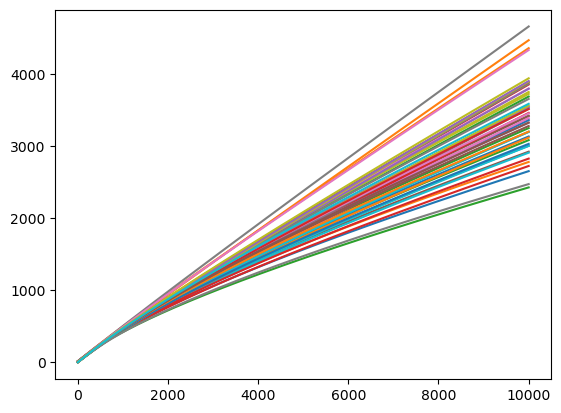

In [9]:
for i in range(M):
    plt.plot(t, Rt[i, :])

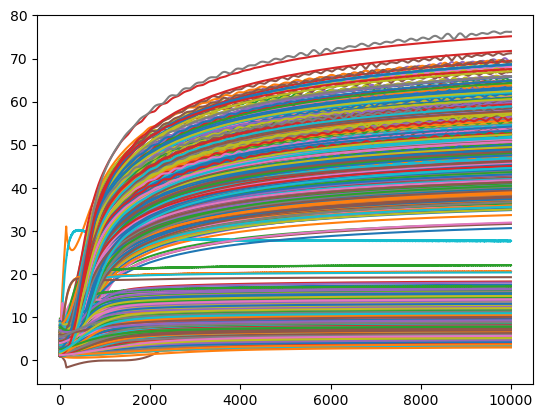

In [10]:
for j in range(assemlies):
    Ct = Ct_assemblies[j]
    t = time_assemblies[j]
    for i in range(N):
        plt.plot(t, Ct[i, :])

In [11]:
Ct_assemblies

[array([[ 1.94552033,  1.94416472,  1.94377667, ..., 53.66777294,
         53.66931803, 53.67097648],
        [ 1.18538518,  1.18694453,  1.18861767, ...,  9.09986746,
          9.09990119,  9.0999349 ],
        [ 7.64973854,  7.63332063,  7.617105  , ...,  6.03922279,
          6.03925643,  6.03929006],
        ...,
        [ 1.54937123,  1.54809091,  1.54729007, ...,  6.95106436,
          6.95109404,  6.95112371],
        [ 1.51901858,  1.51999226,  1.52107133, ...,  9.01965844,
          9.01969949,  9.01974054],
        [ 1.39179106,  1.39376199,  1.39581774, ...,  9.60255321,
          9.60258862,  9.60262402]]),
 array([[ 3.3875468 ,  3.38370906,  3.38039053, ..., 50.57947538,
         50.57996731, 50.58045911],
        [ 2.69418035,  2.69184092,  2.68970551, ...,  5.88976968,
          5.88980383,  5.88983796],
        [ 1.11649445,  1.11876706,  1.12115558, ..., 14.16718637,
         14.16723377, 14.16728115],
        ...,
        [ 1.02330268,  1.02364144,  1.02411326, ...,  

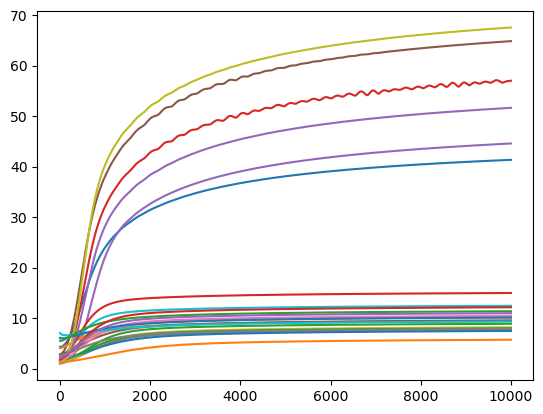

In [12]:
for i in range(N):
        #Ct = Ct_assemblies[j]
        plt.plot(t, Ct[i, :])

In [13]:
mass = Ct_assemblies[i]
mass[:, 1]

array([1.34154056, 2.33261613, 2.30495836, 1.07736941, 1.51075251,
       1.16370969, 4.08141752, 1.3134767 , 5.94261258, 1.13516256,
       1.60731677, 1.55432044, 1.44044228, 1.28007519, 2.11284164,
       1.06337003, 3.08921173, 1.40739755, 2.82125382, 1.7354594 ,
       2.48145056, 5.85641287, 5.60150664, 1.39287122, 4.87594405])

In [14]:
initial = np.empty((N*assemlies))
final = np.empty((N*assemlies))
for i in range(len(para_assemblies)):
    model = para_assemblies[i]
    initial[i*N:(i+1)*N] = model.C.reshape(N)
    mass = Ct_assemblies[i]
    final[i*N:(i+1)*N] = mass[:, -1]

Text(0.5, 0, 'log10(C)')

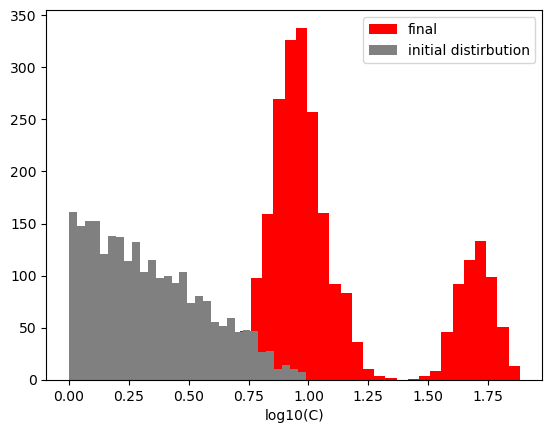

In [15]:
plt.hist(np.log10(final), label='final', color='red', bins=30)
plt.hist(np.log10(initial), label='initial distirbution', color='grey', bins=30)
plt.legend()
plt.xlabel('log10(C)')

In [16]:
Rt.shape

(50, 10000)

In [17]:
species1vg = []

In [18]:
Ct[:, i]

array([4.7297257 , 2.89015962, 1.28025874, 2.41144105, 1.18289573,
       3.67392156, 1.45768401, 1.28391648, 1.3460551 , 2.74384637,
       1.90770441, 4.34385514, 1.68906122, 2.18642025, 2.01506267,
       3.05928013, 1.78439862, 2.80340995, 1.80276203, 6.61243389,
       6.01641171, 1.30465248, 5.75846207, 2.27335015, 2.50141861])

Text(0.5, 0, 'Time')

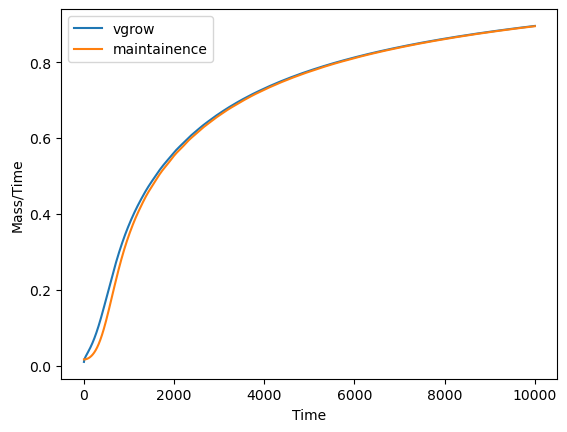

In [19]:
species1vg = []
m1 = []
for i in range(len(t)):
    resourcet = Rt[:, i].reshape(M, 1)
    masst = Ct[:, i].reshape(N, 1)
    v_in = vin(para.p, resourcet, para.R_half, vmax=para.v_in_max, type=2)
    v_in = scale_vin(v_in, masst, para.B0, para.alpha)
    v_g = vgrow(v_in, para.l)
    # v_g = scale_vgrow(v_g, masst, para.B0, para.alpha)
    v_g = v_g * masst
    species1vg.append(v_g[0])
    m_scale = scale_mt(para.m, masst, para.M0, para.alpha)
    m_scale = m_scale * masst
    m1.append(m_scale[0])
    

plt.plot(t, species1vg, label = 'vgrow')
plt.plot(t, m1, label='maintainence')
plt.legend()
plt.ylabel('Mass/Time')
plt.xlabel('Time')

In [20]:
np.sign(-7)

-1